CLASSIFICATION BASED ON OVERALL(RATINGS) AND WAGE_EUR OF THE PLAYERS

Cluster based on attributes and traits

In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score


In [3]:
#Read the data
data=pd.read_csv('players_20.csv')
data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

In [18]:
data.head() #top 5 data

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [19]:
data.info() #inspect the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [20]:
data.describe() #describe to eliminate outliers

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [21]:
data.isnull() #eliminate outliers

sofifa_id  player_url  short_name  long_name    age    dob  height_cm  \
0          False       False       False      False  False  False      False   
1          False       False       False      False  False  False      False   
2          False       False       False      False  False  False      False   
3          False       False       False      False  False  False      False   
4          False       False       False      False  False  False      False   
...          ...         ...         ...        ...    ...    ...        ...   
18273      False       False       False      False  False  False      False   
18274      False       False       False      False  False  False      False   
18275      False       False       False      False  False  False      False   
18276      False       False       False      False  False  False      False   
18277      False       False       False      False  False  False      False   

       weight_kg  nationality   club  ...    lwb    ldm    cdm    rdm    rwb  \
0          False        False  False  ...  False  False  False  False  False   
1          False        False  False  ...  False  False  False  False  False   
2          False        False  False  ...  False  False  False  False  False   
3          False        False  False  ...   True   True   True   True   True   
4          False        False  False  ...  False  False  False  False  False   
...          ...          ...    ...  ...    ...    ...    ...    ...    ...   
18273      False        False  False  ...  False  False  False  False  False   
18274      False        False  False  ...  False  False  False  False  False   
18275      False        False  False  ...  False  False  False  False  False   
18276      False        False  False  ...  False  False  False  False  False   
18277      False        False  False  ...  False  False  False  False  False   

          lb    lcb     cb    rcb     rb  
0      False  False  False  False  False  
1      False  False  False  False  False  
2      False  False  False  False  False  
3       True   True   True   True   True  
4      False  False  False  False  False  
...      ...    ...    ...    ...    ...  
18273  False  False  False  False  False  
18274  False  False  False  False  False  
18275  False  False  False  False  False  
18276  False  False  False  False  False  
18277  False  False  False  False  False  

[18278 rows x 104 columns]

In [22]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [23]:
x= data.loc[0:,['short_name','age','club','overall','potential','wage_eur']]

In [24]:
x

short_name  age                           club  overall  \
0               L. Messi   32                   FC Barcelona       94   
1      Cristiano Ronaldo   34                       Juventus       93   
2              Neymar Jr   27            Paris Saint-Germain       92   
3               J. Oblak   26                Atlético Madrid       91   
4              E. Hazard   28                    Real Madrid       91   
...                  ...  ...                            ...      ...   
18273         Shao Shuai   22               Beijing Renhe FC       48   
18274       Xiao Mingjie   22               Shanghai SIPG FC       48   
18275          Zhang Wei   19         Hebei China Fortune FC       48   
18276       Wang Haijian   18  Shanghai Greenland Shenhua FC       48   
18277         Pan Ximing   26         Hebei China Fortune FC       48   

       potential  wage_eur  
0             94    565000  
1             93    405000  
2             92    290000  
3             93    125000  
4             91    470000  
...          ...       ...  
18273         56      2000  
18274         56      2000  
18275         56      1000  
18276         54      1000  
18277         51      2000  

[18278 rows x 6 columns]

<AxesSubplot:xlabel='overall'>

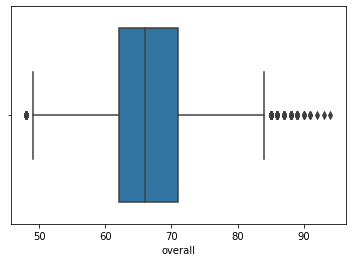

In [25]:
#EDA Boxplot
sns.boxplot(x=data.overall)

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

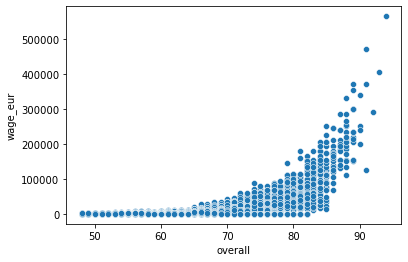

In [26]:
#EDA Scatterplot (Rating and Earning)
sns.scatterplot(x=data.overall,y=data.wage_eur)

In [27]:
#Split data to x and y
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [28]:
x

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...    rm   lwb   ldm   cdm   rdm   rwb  \
0                       FC Barcelona  ...  92+2  68+2  66+2  66+2  66+2  68+2   
1                           Juventus  ...  88+3  65+3  61+3  61+3  61+3  65+3   
2                Paris Saint-Germain  ...  89+3  66+3  61+3  61+3  61+3  66+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  89+3  66+3  63+3  63+3  63+3  66+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  33+2  43+2  42+2  42+2  42+2  43+2   
18274               Shanghai SIPG FC  ...  35+2  44+2  43+2  43+2  43+2  44+2   
18275         Hebei China Fortune FC  ...  45+2  47+2  49+2  49+2  49+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  46+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  46+2  48+2  49+2  49+2  49+2  48+2   

         lb   lcb    cb   rcb  
0      63+2  52+2  52+2  52+2  
1      61+3  53+3  53+3  53+3  
2      61+3  46+3  46+3  46+3  
3       NaN   NaN   NaN   NaN  
4      61+3  49+3  49+3  49+3  
...     ...   ...   ...   ...  
18273  45+2  46+2  46+2  46+2  
18274  46+2  47+2  47+2  47+2  
18275  47+2  49+2  49+2  49+2  
18276  48+2  49+2  49+2  49+2  
18277  48+2  50+2  50+2  50+2  

[18278 rows x 103 columns]

In [29]:
y

0        63+2
1        61+3
2        61+3
3         NaN
4        61+3
         ... 
18273    45+2
18274    46+2
18275    47+2
18276    48+2
18277    48+2
Name: rb, Length: 18278, dtype: object

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12246, 103), (6032, 103), (12246,), (6032,))

In [33]:
data.shape

(18278, 104)

In [34]:
#Cleaning the Data
new_data = data.loc[:, ['player_positions','pace','shooting','passing','dribbling','defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning']]
new_data.head(5)

player_positions  pace  shooting  passing  dribbling  defending  physic  \
0       RW, CF, ST  87.0      92.0     92.0       96.0       39.0    66.0   
1           ST, LW  90.0      93.0     82.0       89.0       35.0    78.0   
2          LW, CAM  91.0      85.0     87.0       95.0       32.0    58.0   
3               GK   NaN       NaN      NaN        NaN        NaN     NaN   
4           LW, CF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  
0        NaN          NaN         NaN          NaN       NaN             NaN  
1        NaN          NaN         NaN          NaN       NaN             NaN  
2        NaN          NaN         NaN          NaN       NaN             NaN  
3       87.0         92.0        78.0         89.0      52.0            90.0  
4        NaN          NaN         NaN          NaN       NaN             NaN

In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_positions  18278 non-null  object 
 1   pace              16242 non-null  float64
 2   shooting          16242 non-null  float64
 3   passing           16242 non-null  float64
 4   dribbling         16242 non-null  float64
 5   defending         16242 non-null  float64
 6   physic            16242 non-null  float64
 7   gk_diving         2036 non-null   float64
 8   gk_handling       2036 non-null   float64
 9   gk_kicking        2036 non-null   float64
 10  gk_reflexes       2036 non-null   float64
 11  gk_speed          2036 non-null   float64
 12  gk_positioning    2036 non-null   float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [37]:
new_data.shape

(18278, 13)

In [38]:
new_data.describe()

pace      shooting       passing     dribbling     defending  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      67.700899     52.298301     57.233777     62.531585     51.553503   
std       11.297656     14.029418     10.407844     10.284950     16.419528   
min       24.000000     15.000000     24.000000     23.000000     15.000000   
25%       61.000000     42.000000     50.000000     57.000000     36.000000   
50%       69.000000     54.000000     58.000000     64.000000     56.000000   
75%       75.000000     63.000000     64.000000     69.000000     65.000000   
max       96.000000     93.000000     92.000000     96.000000     90.000000   

             physic    gk_diving  gk_handling   gk_kicking  gk_reflexes  \
count  16242.000000  2036.000000  2036.000000  2036.000000  2036.000000   
mean      64.876678    65.422397    63.146365    61.832515    66.390472   
std        9.760162     7.736278     7.244023     7.510709     8.154062   
min       27.000000    44.000000    42.000000    35.000000    45.000000   
25%       59.000000    60.000000    58.000000    57.000000    60.750000   
50%       66.000000    65.000000    63.000000    61.000000    66.000000   
75%       72.000000    70.000000    68.000000    66.000000    72.000000   
max       90.000000    90.000000    92.000000    93.000000    92.000000   

          gk_speed  gk_positioning  
count  2036.000000     2036.000000  
mean     37.798625       63.374754  
std      10.634038        8.447876  
min      12.000000       41.000000  
25%      29.000000       58.000000  
50%      39.000000       64.000000  
75%      46.000000       69.000000  
max      65.000000       91.000000

In [39]:
new_data.isnull().sum()

player_positions        0
pace                 2036
shooting             2036
passing              2036
dribbling            2036
defending            2036
physic               2036
gk_diving           16242
gk_handling         16242
gk_kicking          16242
gk_reflexes         16242
gk_speed            16242
gk_positioning      16242
dtype: int64

In [42]:
#Filling the null values with zeroes
X=new_data.fillna(0)

In [43]:
X.head(5)

player_positions  pace  shooting  passing  dribbling  defending  physic  \
0       RW, CF, ST  87.0      92.0     92.0       96.0       39.0    66.0   
1           ST, LW  90.0      93.0     82.0       89.0       35.0    78.0   
2          LW, CAM  91.0      85.0     87.0       95.0       32.0    58.0   
3               GK   0.0       0.0      0.0        0.0        0.0     0.0   
4           LW, CF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  
0        0.0          0.0         0.0          0.0       0.0             0.0  
1        0.0          0.0         0.0          0.0       0.0             0.0  
2        0.0          0.0         0.0          0.0       0.0             0.0  
3       87.0         92.0        78.0         89.0      52.0            90.0  
4        0.0          0.0         0.0          0.0       0.0             0.0

In [44]:
X.isnull().sum()

player_positions    0
pace                0
shooting            0
passing             0
dribbling           0
defending           0
physic              0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_reflexes         0
gk_speed            0
gk_positioning      0
dtype: int64

In [45]:
#Define input
X_new=X.iloc[:,1:13]
X_new.head(5)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
0  87.0      92.0     92.0       96.0       39.0    66.0        0.0   
1  90.0      93.0     82.0       89.0       35.0    78.0        0.0   
2  91.0      85.0     87.0       95.0       32.0    58.0        0.0   
3   0.0       0.0      0.0        0.0        0.0     0.0       87.0   
4  91.0      83.0     86.0       94.0       35.0    66.0        0.0   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  
0          0.0         0.0          0.0       0.0             0.0  
1          0.0         0.0          0.0       0.0             0.0  
2          0.0         0.0          0.0       0.0             0.0  
3         92.0        78.0         89.0      52.0            90.0  
4          0.0         0.0          0.0       0.0             0.0

In [46]:
#Define Model
model = KMeans(n_clusters=4) # Find n_clusters with Elbow method
model

KMeans(n_clusters=4)

In [47]:
Counter(X.player_positions)  

Counter({'RW, CF, ST': 1,
         'ST, LW': 107,
         'LW, CAM': 18,
         'GK': 2036,
         'LW, CF': 8,
         'CAM, CM': 222,
         'CB': 2322,
         'CM': 786,
         'RW, ST': 34,
         'ST, RW': 89,
         'ST': 1809,
         'CDM, CM': 731,
         'CF, ST, LW': 3,
         'CAM, RW': 29,
         'CM, CDM': 682,
         'RW, LW': 72,
         'CAM, LM, ST': 7,
         'ST, LM': 96,
         'LW, LM': 31,
         'CB, LB': 218,
         'RW, CAM, CM': 3,
         'CDM': 363,
         'CF, LM': 2,
         'CF, ST': 21,
         'LB': 669,
         'CM, CAM, CDM': 66,
         'CF, LW, ST': 1,
         'LW': 88,
         'CB, CDM': 192,
         'RB, CM, CDM': 5,
         'CAM, CM, LW': 10,
         'CF, ST, CAM': 13,
         'LW, CM': 5,
         'CAM, RM, RW': 3,
         'CM, CAM': 178,
         'CM, LM, RM': 14,
         'LB, CB': 98,
         'RB': 587,
         'CAM, CF, ST': 6,
         'RW, LW, ST': 16,
         'LB, LM': 190,
         'RM,

In [48]:
model.fit(X_new)
model

KMeans(n_clusters=4)

In [50]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [51]:
model.cluster_centers_

array([[ 6.01165618e+01,  3.48543521e+01,  4.78222270e+01,
         5.11187324e+01,  6.14161059e+01,  6.67825049e+01,
         2.48689958e-14, -2.75335310e-14,  1.27009514e-13,
         1.21680443e-13,  7.19424520e-14,  1.27009514e-13],
       [-2.55795385e-13, -3.12638804e-13,  4.05009359e-13,
         1.70530257e-13,  5.68434189e-13, -2.84217094e-13,
         6.54223969e+01,  6.31463654e+01,  6.18325147e+01,
         6.63904715e+01,  3.77986248e+01,  6.33747544e+01],
       [ 7.24693512e+01,  6.14352788e+01,  5.73663189e+01,
         6.64802739e+01,  3.30857515e+01,  5.92292142e+01,
         3.55271368e-14, -2.66453526e-14,  1.41220369e-13,
         1.62536651e-13,  9.85878046e-14,  1.78523862e-13],
       [ 6.87355026e+01,  5.67189602e+01,  6.49680058e+01,
         6.76866024e+01,  6.38865661e+01,  6.95778949e+01,
         9.41469125e-14,  3.55271368e-14,  1.38555833e-13,
         1.64313008e-13,  7.37188088e-14,  2.46913601e-13]])

ELBOW METHOD TO FIND N CLUSTERS AND KMEANS

In [52]:
from scipy.spatial.distance import cdist
import numpy as np

In [53]:
# Find the wcss(within cluster sum of squares)
k = range(1,16)
wcss = []
for i in k:
    kmodel = KMeans(n_clusters=i)
    kmodel.fit(X_new)
    wcss.append(sum(np.min(cdist(X_new,kmodel.cluster_centers_,'Euclidean'),axis=1))/X_new.shape[0])

In [54]:
X_new.shape[0]

18278

In [55]:
wcss

[53.530475456374006,
 27.324047624665415,
 22.16656214213765,
 19.35404952537392,
 18.277870146225023,
 17.31611679752003,
 16.76722515398448,
 16.265386361147918,
 15.752098077840804,
 15.305859893159838,
 14.88604481972435,
 14.566726331820355,
 14.277657365067405,
 14.009727797400798,
 13.80117055225602]

In [56]:
#plotting to find which is the optimal clusters
import matplotlib.pyplot as plt

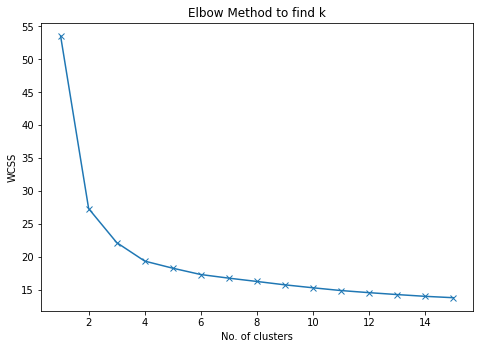

In [57]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_xlabel("No. of clusters")
ax.set_ylabel("WCSS")
ax.set_title("Elbow Method to find k")
ax.plot(k,wcss,marker='x')
plt.show()

sc=1 the cluster is dense and it is currently clustered into a particular group
sc=0 the cluster is sparsely fitted to data values
sc= 1 to 0 somewhat mid between densely clustered and sparsely clustered
sc=-1 data is clustered with improper groups 

In [58]:
score = silhouette_score(X_new, model.labels_, metric='euclidean') 
score

0.3702625925772212

Here we can say that data is between sparsely fitted and densly fitted in clusters as per the score is close 0.5

In [4]:
import os
os.getcwd()

'C:\\Users\\Hp\\SANIYA SAMAN'